In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
train_images.shape

(60000, 28, 28)

In [54]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [5]:
test_images.shape

(10000, 28, 28)

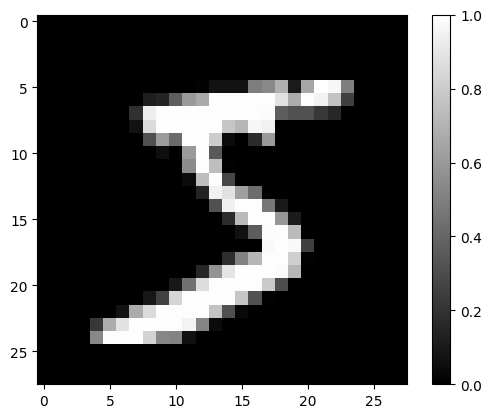

In [72]:
plt.figure()
plt.imshow(train_images[0], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images, val_images, test_labels, val_labels = train_test_split(
    test_images, test_labels, test_size=0.5, random_state=42)

val_images = val_images / 255.0
test_images = test_images / 255.0

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu',
                       kernel_initializer='he_uniform'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\usuario\Documents\IABD\PIA\Tema 2\Red Neuronal 2\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001,  # minimium amount of change to count as an improvement
    patience=20,  # how many epochs to wait before stopping
    restore_best_weights=True,
)


model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    batch_size=6000,
    epochs=500,
    callbacks=[early_stopping],

)



test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)



print('\nTest loss:', test_loss)


print('\nTest accuracy:', test_acc)

Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4139 - loss: 1.8083 - val_accuracy: 0.8450 - val_loss: 0.6457
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.8152 - loss: 0.6529 - val_accuracy: 0.8886 - val_loss: 0.4005
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8675 - loss: 0.4445 - val_accuracy: 0.9062 - val_loss: 0.3315
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8868 - loss: 0.3790 - val_accuracy: 0.9148 - val_loss: 0.2904
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9001 - loss: 0.3367 - val_accuracy: 0.9264 - val_loss: 0.2601
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9093 - loss: 0.3085 - val_accuracy: 0.9332 - val_loss: 0.2395
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.9189 - loss: 0.2817 - val_accuracy: 0.9386 - val_loss: 0.2225
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9250 - loss: 0.2660 - val_accuracy: 0.

In [13]:
predictions = model.predict(test_images)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


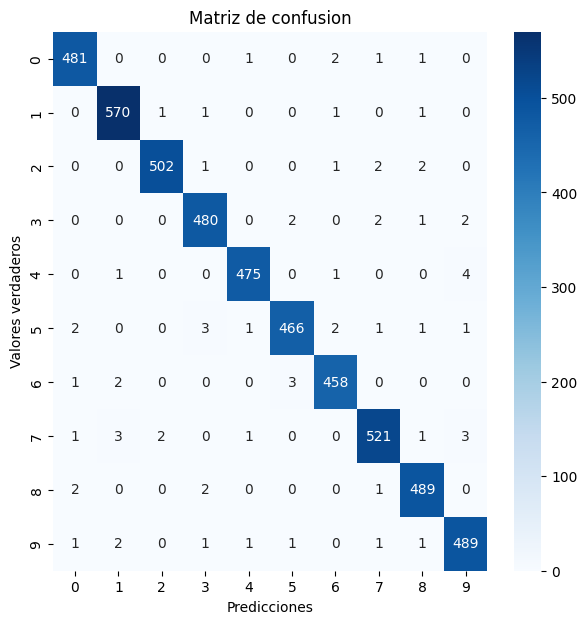

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       486
           1       0.99      0.99      0.99       574
           2       0.99      0.99      0.99       508
           3       0.98      0.99      0.98       487
           4       0.99      0.99      0.99       481
           5       0.99      0.98      0.98       477
           6       0.98      0.99      0.99       464
           7       0.98      0.98      0.98       532
           8       0.98      0.99      0.99       494
           9       0.98      0.98      0.98       497

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [14]:
cm = confusion_matrix(test_labels, np.argmax(predictions, axis=1))
classes = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=classes, yticklabels=classes,fmt='.0f')
plt.title('Matriz de confusion')
plt.xlabel('Predicciones')
plt.ylabel('Valores verdaderos')
plt.show()
print(classification_report(test_labels, np.argmax(predictions, axis=1)))

In [15]:
model.save('mnist.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
8


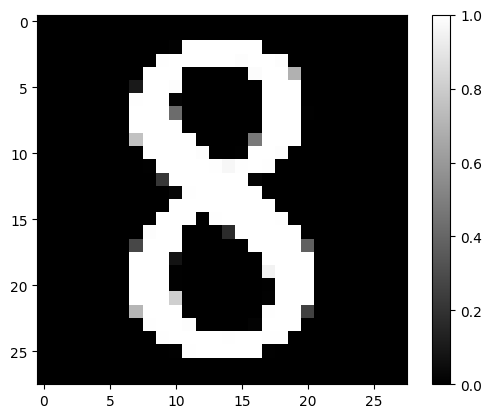

In [84]:
import cv2

img = cv2.imread('8.jpg')
resized_img = cv2.resize(img, (28, 28))
gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
inverted_image = cv2.bitwise_not(gray_img)
inverted_image = np.expand_dims(inverted_image, axis=0)/255.0
plt.imshow(inverted_image[0], cmap='gray')
plt.colorbar()

print(np.argmax(model.predict(inverted_image)))